# Unser Finanzprojekt

Dieses Notebook enthält Datenbereinigung und Analysen zur Zeitreihe der Preisentwicklung des Deutschen Aktienindex DAX.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read in csv data
df = pd.read_csv("GDAX_histdata.csv",)
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
8722,2021-11-10,16053.000000,16076.559570,15985.900391,16067.830078,16067.830078,62124400.0
8723,2021-11-11,16067.339844,16114.549805,16032.500000,16083.110352,16083.110352,56626200.0
8724,2021-11-12,16100.080078,16122.759766,16065.059570,16094.070313,16094.070313,60302900.0
8725,2021-11-15,16109.410156,16149.870117,16072.290039,16148.639648,16148.639648,53296600.0
8726,2021-11-16,16174.309570,16266.259766,16157.580078,16247.860352,16247.860352,56783300.0


In [3]:
#general statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,8559.0,6.053019e+03,3.801706e+03,936.0,2540.349976,5.471700e+03,8.141850e+03,1.617431e+04
High,8559.0,6.094780e+03,3.823382e+03,936.0,2549.760010,5.523670e+03,8.193645e+03,1.626626e+04
Low,8559.0,6.006814e+03,3.777956e+03,936.0,2524.994996,5.419550e+03,8.097360e+03,1.615758e+04
Close,8559.0,6.052400e+03,3.801565e+03,936.0,2540.334961,5.468470e+03,8.125125e+03,1.624786e+04
Adj Close,8559.0,6.052400e+03,3.801565e+03,936.0,2540.334961,5.468470e+03,8.125125e+03,1.624786e+04
Volume,8559.0,6.814296e+07,6.434472e+07,0.0,0.000000,7.229720e+07,1.064260e+08,5.101956e+08


In [4]:
#check for holidays
df.loc[df["Close"].isna(),"Date"]

1       1987-12-31
2       1988-01-01
67      1988-04-01
68      1988-04-04
96      1988-05-12
           ...    
7232    2015-12-25
7598    2017-06-05
7684    2017-10-03
7704    2017-10-31
7842    2018-05-21
Name: Date, Length: 168, dtype: object

In [5]:
#drop rows for holidays (no data)?

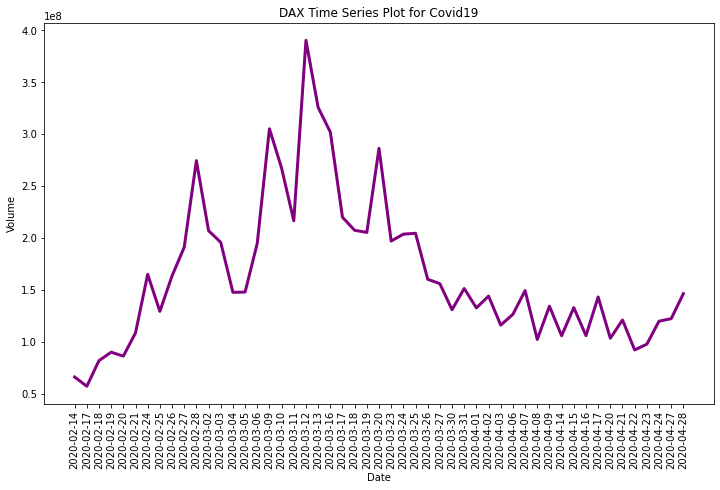

In [6]:
fig,ax = plt.subplots(figsize=[12,7])
sns.lineplot(x=df.loc[8280:8330,"Date"],
             y=df.loc[8280:8330,"Volume"],
             linewidth=3, color='purple',
             ).set(title='DAX Time Series Plot for Covid19');
plt.xticks(rotation=90);

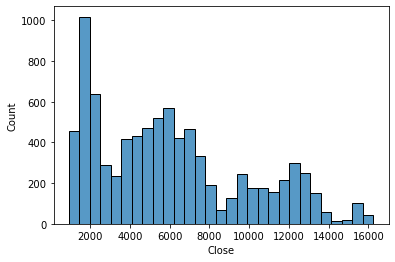

In [7]:
sns.histplot(df["Close"]);

In [51]:
#df = df.dropna()
df=df.loc[:300,:]

def calculate_ema(prices, days, smoothing=2):
    """
    Calculate EMA for given stock prices (list or df column) 
    and given number of days (int), usually 10,20,38,50,100 or 200
    Returns EMA for given period
    """
    
    #Initialize EMA with stock price of first day
    ema = [prices[0]]
    #print(0,ema)
    
    #Calculate SMA for first X days with X being days
    for day in range(1,days):
        ema.append(sum(prices[:day]) / day)
        #print(day,ema[day])
    
    #Start appending EMA values at day'th value
    for price in prices[days:]:
        ema.append((price * (smoothing / (1 + days))) + ema[-1] * (1 - (smoothing / (1 + days))))
        
    return ema

        #symbol = 'MSFT'
        #df = web.DataReader(symbol, 'yahoo', '2015-01-01', '2016-01-01')



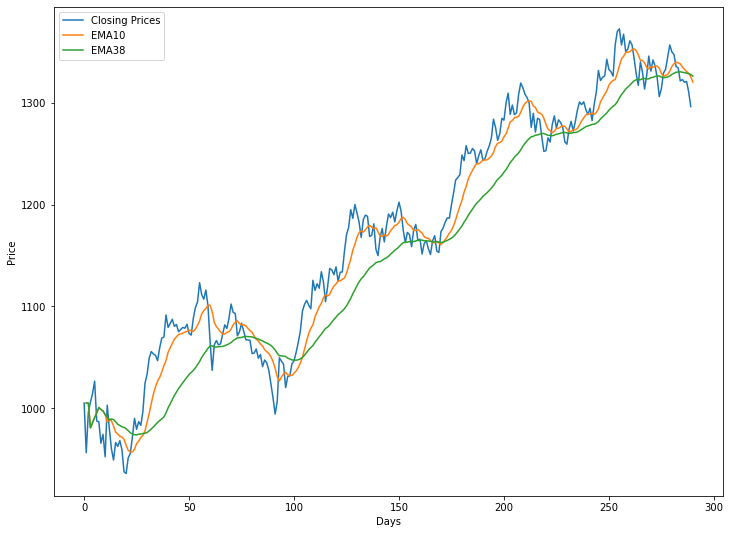

In [52]:
days=10
ema = calculate_ema(prices=df['Close'], days=days)
days2=38
ema2 = calculate_ema(prices=df['Close'], days=days2)

price_X = np.arange(df.shape[0])     
ema_X = np.arange(1, df.shape[0]+1) 
ema_X2 = np.arange(1, df.shape[0]+1)


plt.subplots(figsize=[12,9])
plt.xlabel('Days')
plt.ylabel('Price')
plt.plot(price_X, df['Close'], label='Closing Prices')
plt.plot(ema_X, ema, label='EMA'+str(days))
plt.plot(ema_X2, ema2, label='EMA'+str(days2))
plt.legend()
plt.show()

In [10]:
#Ziel:
# Herausfinden, wie gut EMA Schnittpunkt dient, größere Rallyes vorherzusagen (Einstiegszeitpunkt)
#     + Grafik dazu für Fälle in denen EMA38 den EMA200 von unten nach oben schneidet:
#             x: Tage nach Ereignis
#             y: prozentuale Veränderung des Preises

In [67]:
#Retrieve day at which upward crossing occurs
for i in range(1,len(ema)):
    w = (ema[i]>ema2[i])+(ema[i-1]>ema2[i-1])
    if (w==1)&(ema[i]>ema2[i]):
        print("Day at which EMA10 crosses EMA38 upward is",i,ema[i-1:i],ema2[i-1:i])
#--> Add column to df with 'upward crossing flag' 

290 290 290
Day at which EMA10 crosses EMA38 upward is 11 [986.3681808181818] [991.9589967]
Day at which EMA10 crosses EMA38 upward is 28 [973.5519001639012] [975.2499977777775]
Day at which EMA10 crosses EMA38 upward is 103 [1044.4260359042833] [1048.5227506457984]
Day at which EMA10 crosses EMA38 upward is 167 [1162.7110559071652] [1163.2530995080383]
Day at which EMA10 crosses EMA38 upward is 171 [1162.8554403467597] [1163.1322008110733]
